In [2]:
import pandas as pd
import numpy as np
train_df=pd.read_csv('../input/nlp-getting-started/train.csv')
test_df=pd.read_csv('../input/nlp-getting-started/test.csv')
sub_df=pd.read_csv('../input/nlp-getting-started/sample_submission.csv')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
!pip install text_hammer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 588.1 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.1
    Uninstalling beautifulsoup4-4.11.1:
      Successfully uninstalled beautifulsoup4-4.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.


In [6]:
import text_hammer as th

In [9]:
%%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column=col_name
    df[column]=df[column].progress_apply(lambda x: str(x).lower())
    df[column]=df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column]=df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column]=df[column].progress_apply(lambda x: th.make_base(x))    
    df[column]=df[column].progress_apply(lambda x: th.cont_exp(x))
    df[column]=df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column]=df[column].progress_apply(lambda x: th.remove_accented_chars(x))
                                         
                                         
    return df
                                         

CPU times: user 502 µs, sys: 45 µs, total: 547 µs
Wall time: 668 µs


In [10]:
train_cleaned_df=text_preprocessing(train_df,'text')

  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

In [11]:
train_cleaned_df

,id,keyword,location,text,target
0,1,NaN,NaN,our deed are the reason of this earthquake may...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all resident ask to shelter in place are being...,1
3,6,NaN,NaN,13000 people receive wildfire evacuation order...,1
4,7,NaN,NaN,just get send this photo from ruby alaska as s...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant crane hold a bridge collapse into ne...,1
7609,10870,NaN,NaN,aria_ahrary thetawniest the out of control wil...,1
7610,10871,NaN,NaN,m194 0104 coordinated universal time5 km s of ...,1
7611,10872,NaN,NaN,police investigate after an e bike collide wit...,1


In [12]:
train_df=train_cleaned_df.copy()

In [13]:
train_df=train_df.drop(columns=['id','keyword','location'],axis=1)
train_df.head()

,text,target
0,our deed are the reason of this earthquake may...,1
1,forest fire near la ronge sask canada,1
2,all resident ask to shelter in place are being...,1
3,13000 people receive wildfire evacuation order...,1
4,just get send this photo from ruby alaska as s...,1


In [14]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

# Loading pretrained BERT model

In [16]:
import transformers
from transformers import AutoTokenizer,TFBertModel
tokenizer=AutoTokenizer.from_pretrained('bert-large-uncased')
bert=TFBertModel.from_pretrained('bert-large-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

2022-07-14 21:33:59.716954: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-14 21:33:59.720840: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-14 21:33:59.721499: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-14 21:33:59.723156: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [17]:
tokenizer('i will be kaggle grandmaster')

{'input_ids': [101, 1045, 2097, 2022, 10556, 24679, 27101, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [20]:
print('max length of words is ',max([len(x.split()) for x in train_df.text]))

max length of words is  35


In [22]:
max_length=40

# Changing our text data into bert input format

In [24]:
x_train=tokenizer(
        
    text=train_df['text'].tolist(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=True,
    return_attention_mask=True,
    verbose=True
    
    )

In [29]:
x_train.input_ids.shape

TensorShape([7613, 40])

In [28]:
x_train.attention_mask.shape

TensorShape([7613, 40])

In [30]:
x_train.token_type_ids.shape

TensorShape([7613, 40])

In [32]:
y_train=train_df['target'].values
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy,BinaryAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [40]:
input_ids=Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
input_mask=Input(shape=(max_length,),dtype=tf.int32 ,name='attention_mask')
token_ids=Input(shape=(max_length,), dtype=tf.int32, name='token_type_ids')

In [46]:
embedding=bert(input_ids,attention_mask=input_mask,token_type_ids=token_ids)[1]
out=tf.keras.layers.Dropout(0.1)(embedding)

out=Dense(120,activation='relu')(out)
out=tf.keras.layers.Dropout(0.11)(out)
out=Dense(31,activation='relu')(out)

y=Dense(1,activation='relu')(out)

model=tf.keras.Model(inputs=[input_ids,input_mask,token_ids],outputs=y)
model.layers[2].trainable=True


In [47]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 40)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 40)]         0                                            
__________________________________________________________________________________________________
token_type_ids (InputLayer)     [(None, 40)]         0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 335141888   input_ids[0][0]                  
                                                                 attention_mask[0][0]         

In [48]:
optimizer=Adam(
 
    learning_rate=5e-6,
    epsilon=1e-8,
    decay=0.01,
    clipnorm=1.0

)

loss=BinaryCrossentropy(from_logits=True)
metrics=BinaryAccuracy('accuracy')
model.compile(optimizer=optimizer,loss=loss,metrics=metrics)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


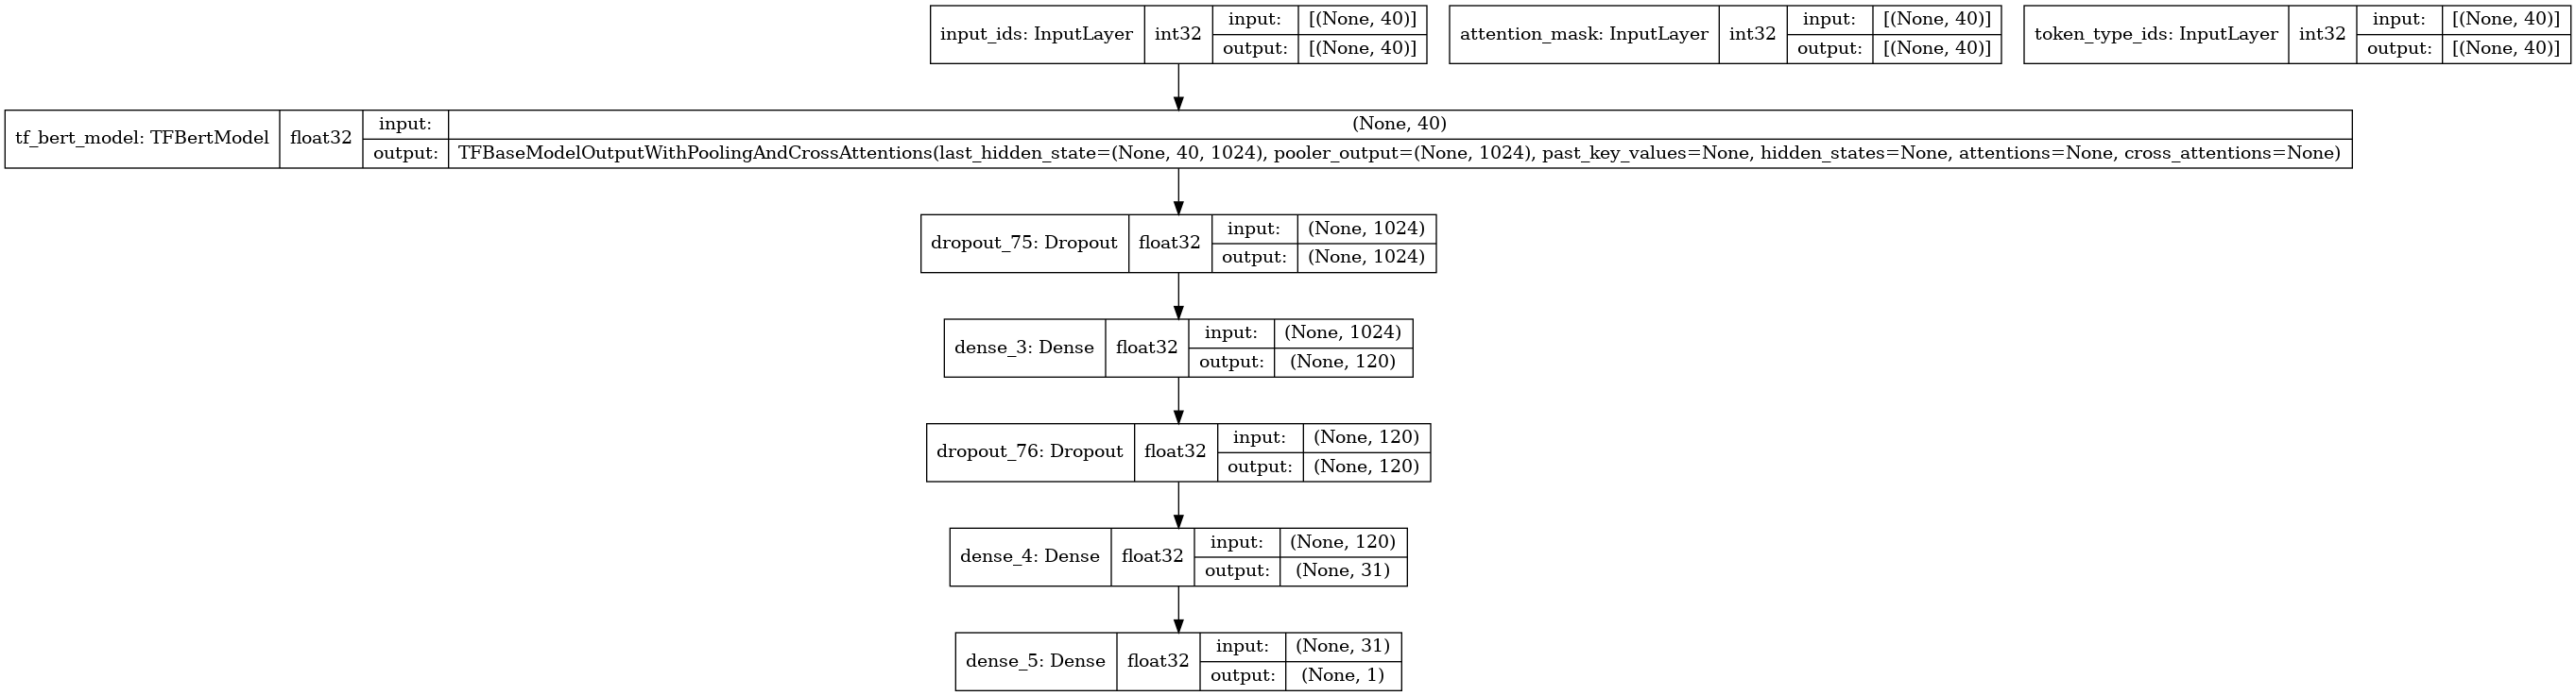

In [52]:
plot_model(model=model,show_shapes=True,show_dtype=True,expand_nested=True)

In [57]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [59]:
train_history=model.fit(

    x={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask'],'token_type_ids':x_train['token_type_ids']},
    y=y_train,
    validation_split=0.20,
    epochs=3,
    batch_size=45

)

Epoch 1/3
136/136 [==============================] - 114s 839ms/step - loss: 0.5979 - accuracy: 0.7946 - val_loss: 0.5503 - val_accuracy: 0.8162
Epoch 2/3
136/136 [==============================] - 114s 838ms/step - loss: 0.5797 - accuracy: 0.8140 - val_loss: 0.5499 - val_accuracy: 0.8273
Epoch 3/3
136/136 [==============================] - 115s 848ms/step - loss: 0.5644 - accuracy: 0.8278 - val_loss: 0.5500 - val_accuracy: 0.8280


# Working with test data

In [61]:
test_df=test_df.drop(columns=['id','keyword','location'],axis=1)
test_df.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [63]:
test_df=text_preprocessing(test_df,'text')
test_df.head()

  0%|          | 0/3263 [00:00<?, ?it/s]

  0%|          | 0/3263 [00:00<?, ?it/s]

  0%|          | 0/3263 [00:00<?, ?it/s]

  0%|          | 0/3263 [00:00<?, ?it/s]

  0%|          | 0/3263 [00:00<?, ?it/s]

  0%|          | 0/3263 [00:00<?, ?it/s]

  0%|          | 0/3263 [00:00<?, ?it/s]

,text
0,just happen a terrible car crash
1,hear about earthquake is different city stay s...
2,there is a forest fire at spot pond geese are ...
3,apocalypse lighting spokane wildfire
4,typhoon soudelor kill 28 in china and taiwan


In [66]:
x_test=tokenizer(

    text=test_df.text.tolist(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=True,
    return_attention_mask=True,
    verbose=True


)

In [67]:
predicted=model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask'],'token_type_ids':x_test['token_type_ids']})

In [68]:
predicted

array([[1.0362735 ],
       [2.1733882 ],
       [1.6141648 ],
       ...,
       [3.0847392 ],
       [2.6747558 ],
       [0.73575896]], dtype=float32)

In [69]:
predicted.shape

(3263, 1)

In [70]:
y_predicted=np.where(predicted>0.5,1,0)
y_predicted

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [72]:
sub_df.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [74]:
y_predicted=y_predicted.reshape(-1,)

In [75]:
submission=pd.DataFrame({'id':sub_df['id'],'target':y_predicted})
submission.tail()

,id,target
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1
3262,10875,1


In [76]:
submission.target.value_counts(normalize=True)

0    2209
1    1054
Name: target, dtype: int64

In [77]:
submission.to_csv('bert_nlp2.csv',index=None)